In [304]:
import os
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#BASE_DIR = "../input/specific_disease/diabetes"

#DATA_PATH = os.path.join(BASE_DIR, "diabetes.csv")
#DATA_PATH_EARLY_DETECTION = os.path.join(BASE_DIR, "early_stage_diabetes.csv")

In [305]:
# Reading the dataset
actual_patient_data = pd.read_csv(r'C:\Users\spjay\Desktop\Project Files\diabetes_data_upload.csv')

In [306]:
# Printing the first 5 rows of the dataframe.
actual_patient_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [307]:
#Checking Missing Values
actual_patient_data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [308]:
#Feature information
actual_patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [309]:
# Print the size of the data set. It consists of 520 observation units and 17 variables.
print("Dataset shape:", actual_patient_data.shape)

Dataset shape: (520, 17)


In [310]:
# Print the distribution of the target variable.
actual_patient_data["class"].value_counts()*100/len(actual_patient_data)

Positive    61.538462
Negative    38.461538
Name: class, dtype: float64

In [311]:
# Print the classes of the target variable.
actual_patient_data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

# Data Analysis

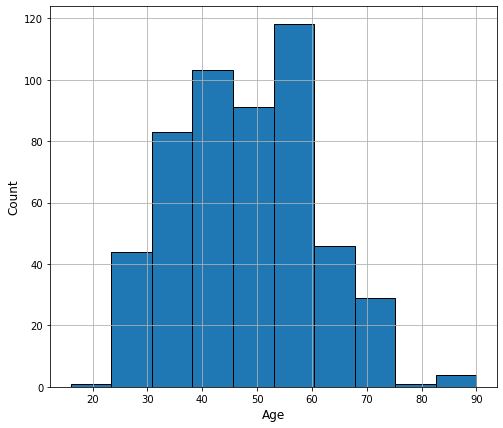

In [312]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
actual_patient_data["Age"].hist(edgecolor = "black");

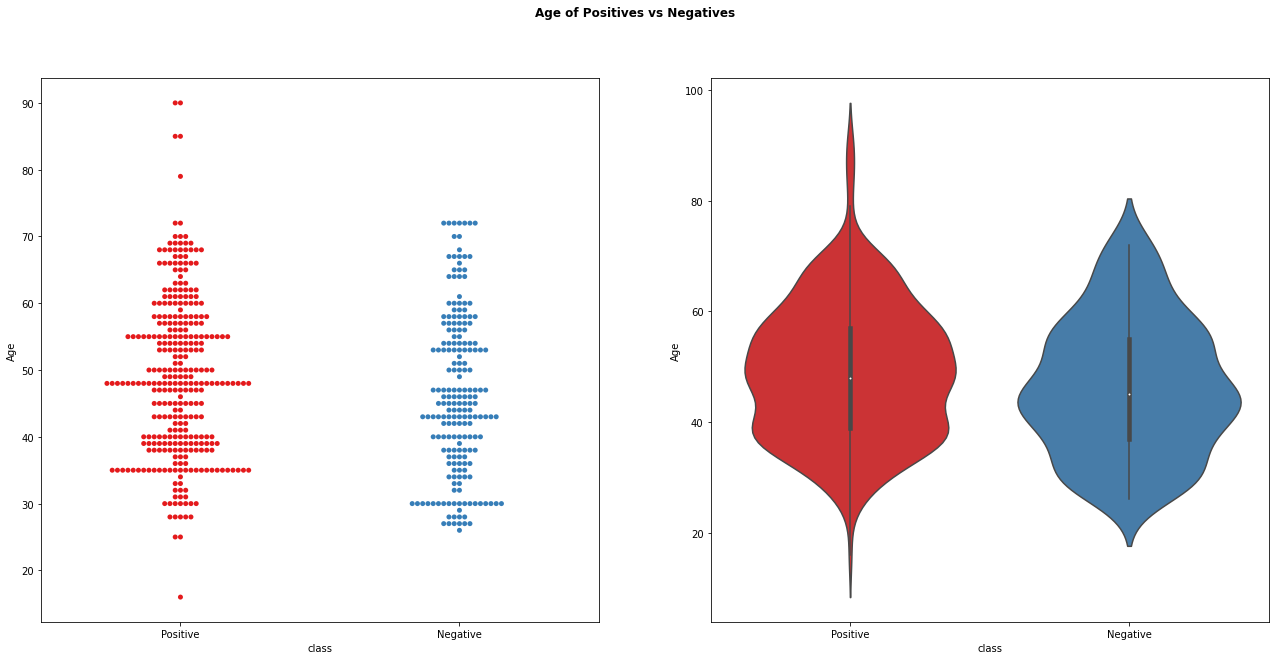

In [313]:
#Age of Positives vs Negatives
f,ax=plt.subplots(1,2,figsize=(22,10))
sns.swarmplot(x="class", y="Age",data=actual_patient_data, palette="Set1", ax=ax[0])
sns.violinplot(x="class", y="Age", data=actual_patient_data, palette="Set1", ax=ax[1])
f.suptitle('Age of Positives vs Negatives', fontweight="bold");

In [314]:
print("Max Age: " + str(actual_patient_data["Age"].max()) +','+ " Min Age: " + str(actual_patient_data["Age"].min()))

Max Age: 90, Min Age: 16


class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


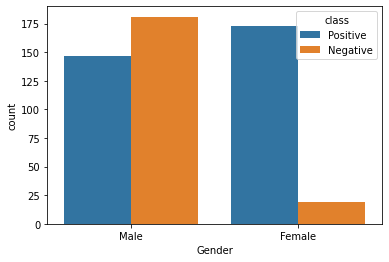

In [315]:
sns.countplot(actual_patient_data['Gender'],hue=actual_patient_data['class'], data=actual_patient_data)

plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


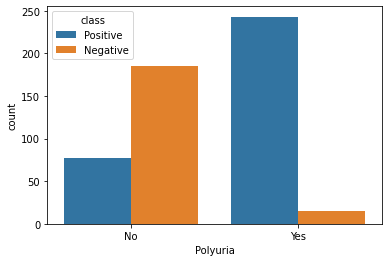

In [316]:
# Distribution of Polyuria
sns.countplot(actual_patient_data['Polyuria'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


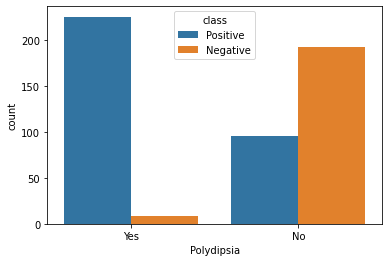

In [317]:
# Distribution of Polydipsia
sns.countplot(actual_patient_data['Polydipsia'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


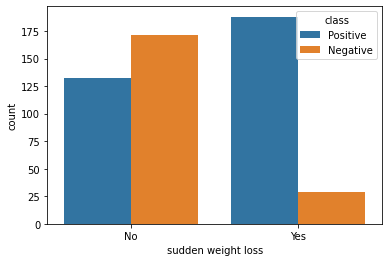

In [318]:
# Distribution of sudden weight loss
sns.countplot(actual_patient_data['sudden weight loss'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


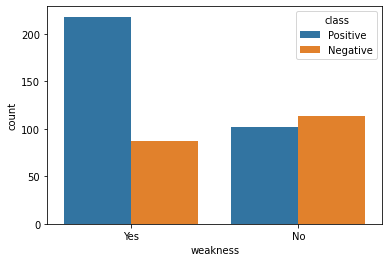

In [319]:
# Distribution of weakness
sns.countplot(actual_patient_data['weakness'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


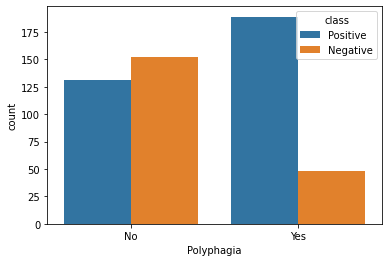

In [320]:
# Distribution of Polyphagia
sns.countplot(actual_patient_data['Polyphagia'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


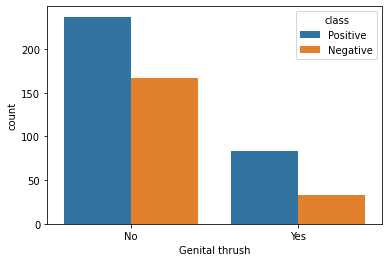

In [321]:
# Distribution of Genital thrush
sns.countplot(actual_patient_data['Genital thrush'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


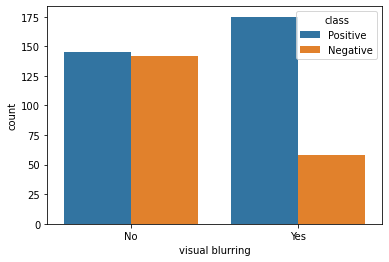

In [322]:
# Distribution of visual blurring
sns.countplot(actual_patient_data['visual blurring'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


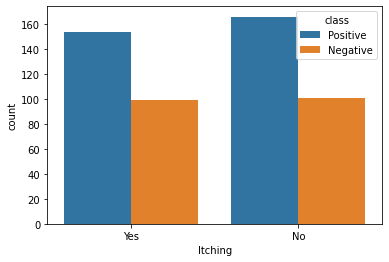

In [323]:
# Distribution of Itching
sns.countplot(actual_patient_data['Itching'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


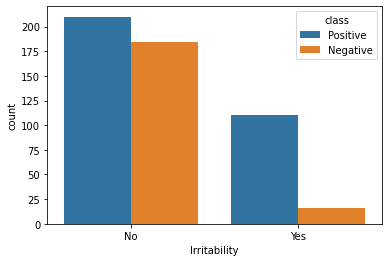

In [324]:
# Distribution of Irritability
sns.countplot(actual_patient_data['Irritability'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


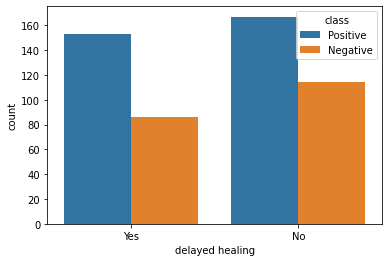

In [325]:
# Distribution of delayed healingdelayed healing
sns.countplot(actual_patient_data['delayed healing'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


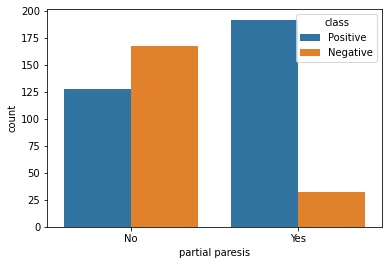

In [326]:
# Distribution of partial paresis
sns.countplot(actual_patient_data['partial paresis'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


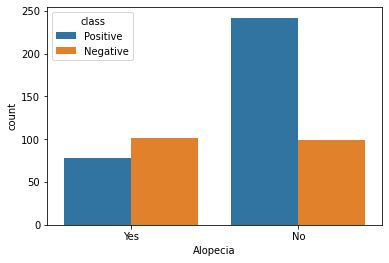

In [327]:
# Distribution of muscle stiffness
sns.countplot(actual_patient_data['Alopecia'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


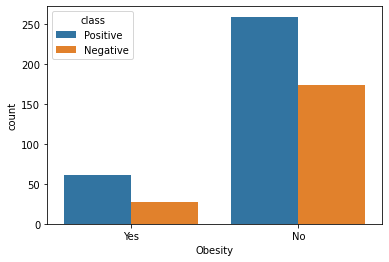

In [328]:
# Distribution of Obesity
sns.countplot(actual_patient_data['Obesity'],hue=actual_patient_data['class'], data=actual_patient_data)


plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(actual_patient_data[plot_criteria[0]], actual_patient_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

In [329]:
for c in actual_patient_data.columns:
    if actual_patient_data[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(actual_patient_data[c].values)) 
        actual_patient_data[c] = lbl.transform(list(actual_patient_data[c].values))
        
actual_patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


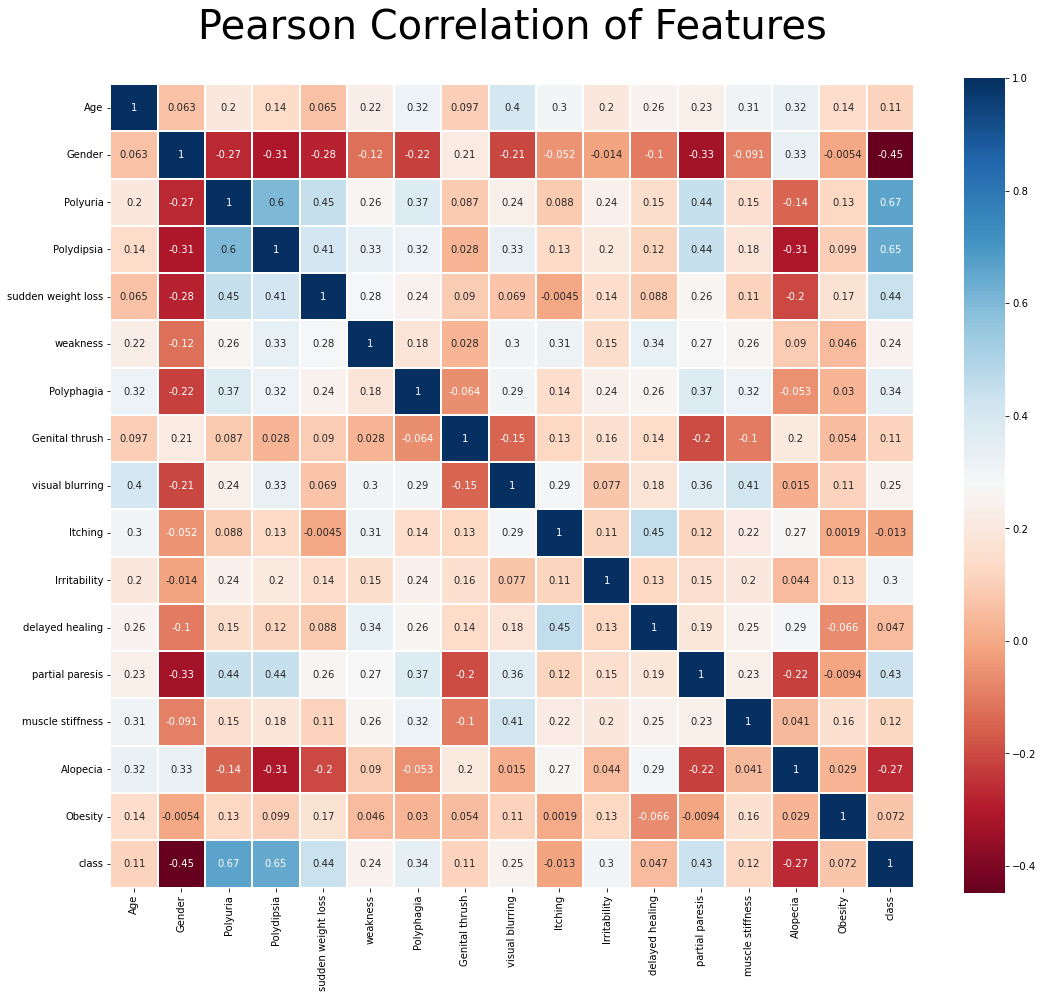

In [330]:
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15));
plt.title('Pearson Correlation of Features', y=1.05, size=40);
sns.heatmap(actual_patient_data.corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

# Data Pre-Processing

In [331]:
# Separating Target feature
X = actual_patient_data.drop(['class'], axis=1)
y = actual_patient_data['class']

In [332]:
y.value_counts()

1    320
0    200
Name: class, dtype: int64

In [333]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index([], dtype='object')


In [334]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [335]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [336]:
#Correlation between features
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

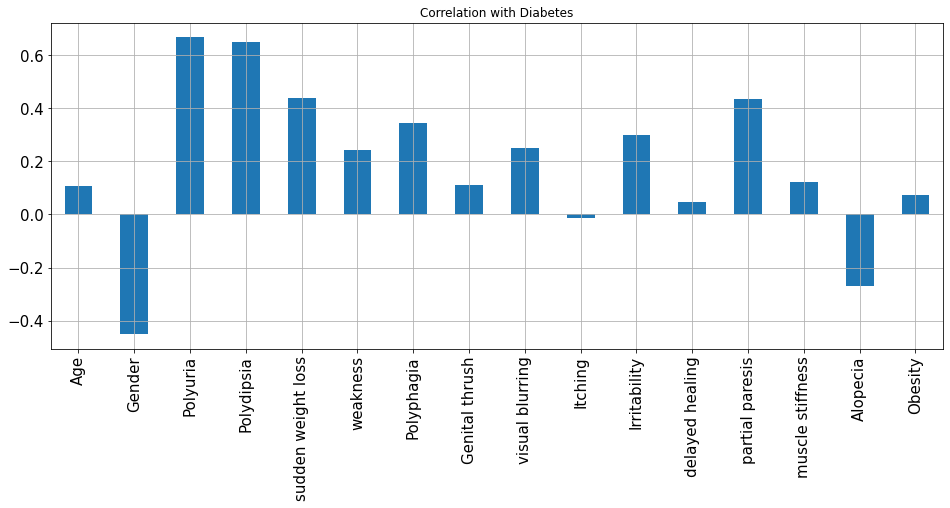

In [337]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y, random_state = 0)

In [339]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    224
0    140
Name: class, dtype: int64
Distribution of target variable in test set
1    96
0    60
Name: class, dtype: int64


In [340]:
#Data Normalizaiton
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

# Model Building¶

In [341]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [342]:
# model predictions

y_pred = log_reg.predict(X_test)

In [343]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_train, log_reg.predict(X_train)))

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)

0.945054945054945
0.9358974358974359


In [344]:
# Model Evaluation
y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, prec, rec, f1,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.935897,0.947917,0.947917,0.947917,0.932292


In [345]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

In [346]:
y_pred = rand_clf.predict(X_test)

In [347]:
# Model Evaluation
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc,prec,rec, f1,roc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.935897,0.947917,0.947917,0.947917,0.932292
1,Random Forest,0.967949,0.959596,0.989583,0.974359,0.961458


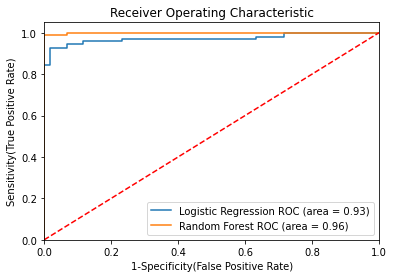

In [348]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()